<h1 align='center'> Movie Genre Predictor</h1>

# INTRODUCTION

## Overview

Welcome to the Movie Genre Predictor project! This project aims to predict movie genres based on various features extracted from movie data obtained from The Movie Database (TMDB). The goal is to develop a machine learning model that accurately predicts the genre of a movie given its title, overview.

Classifying a text document into one or the other pre-defined classes (e.g., spam or not a spam) is an example of a standard Binary Classification problem. There are other scenarios where in one would need to classify the document into more than 2 classes. This is a multi-class classification problem where a data instance is associated with only one of the many single class labels, e.g., News Topic Classifier with the possible classes as 'Food', 'Sports', 'Politics' wherein each article can fall into only one of these classes. 

In this project, we will look into a scenario where each document can possibly assigned to more than one class, i.e., multi-label classification. The dataset comes from TMDB contains several informations about the movie. Here, we will use the plot of the movie and find out what are all the genres it falls under.

## Business Problem

In the realm of movie production and recommendation systems, accurately predicting movie genres is crucial for various applications such as content recommendation, marketing strategies, and audience targeting. This project addresses the challenge of predicting movie genres effectively using machine learning techniques.

In [1]:
# Import necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

mpl.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
})


# **1.Data Acquisition**

In [4]:
from credientials import api_key

In [143]:
import requests
response = requests.get(f"https://api.themoviedb.org/3/movie/top_rated?api_key={api_key}&language=en-US&page=1")
response.status_code

200

In [144]:
response.json()

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg',
   'genre_ids': [18, 80],
   'id': 278,
   'original_language': 'en',
   'original_title': 'The Shawshank Redemption',
   'overview': 'Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.',
   'popularity': 126.841,
   'poster_path': '/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg',
   'release_date': '1994-09-23',
   'title': 'The Shawshank Redemption',
   'video': False,
   'vote_average': 8.704,
   'vote_count': 25817},
  {'adult': False,
   'backdrop_path': '/tmU7GeKVybMWFButWEGl2M4GeiP.jpg',
   'genre_ids': [18, 80],
   'id': 238,
   'original_language': 'en',
   'orig

In [145]:
response.json()["results"]

[{'adult': False,
  'backdrop_path': '/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg',
  'genre_ids': [18, 80],
  'id': 278,
  'original_language': 'en',
  'original_title': 'The Shawshank Redemption',
  'overview': 'Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.',
  'popularity': 126.841,
  'poster_path': '/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg',
  'release_date': '1994-09-23',
  'title': 'The Shawshank Redemption',
  'video': False,
  'vote_average': 8.704,
  'vote_count': 25817},
 {'adult': False,
  'backdrop_path': '/tmU7GeKVybMWFButWEGl2M4GeiP.jpg',
  'genre_ids': [18, 80],
  'id': 238,
  'original_language': 'en',
  'original_title': 'The Godfather',
  'overview':

In [146]:
movies = pd.DataFrame(response.json()["results"])[['genre_ids','title','overview']]
movies.sample(10)

,genre_ids,title,overview
8,"[35, 53, 18]",Parasite,"All unemployed, Ki-taek's family takes peculia..."
12,"[12, 14, 28]",The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...
3,"[18, 36, 10752]",Schindler's List,The true story of how businessman Oskar Schind...
6,"[35, 18, 10749]",Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
14,[37],"The Good, the Bad and the Ugly",While the Civil War rages on between the Union...
11,"[53, 80]",Pulp Fiction,"A burger-loving hit man, his philosophical par..."
15,"[18, 80]",GoodFellas,"The true story of Henry Hill, a half-Irish, ha..."
2,"[18, 80]",The Godfather Part II,In the continuing saga of the Corleone crime f...
9,"[14, 18, 80]",The Green Mile,A supernatural tale set on death row in a Sout...
19,"[28, 18]",Seven Samurai,A samurai answers a village's request for prot...


In [147]:
movies['overview'].values

array(['Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.',
       'Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime family. When organized crime family patriarch, Vito Corleone barely survives an attempt on his life, his youngest son, Michael steps in to take care of the would-be killers, launching a campaign of bloody revenge.',
       'In the continuing saga of the Corleone crime family, a young Vito Corleone grows up in Sicily and in 1910s New York. In the 1950s, Michael Corleone attempts to expand the family business into Las Vegas, Hollywood and Cuba.',
       'The true story of how businessman Oskar Sc

In [148]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [149]:
movies = pd.DataFrame()
for page_no in range(1, 464):
    response = requests.get(f"https://api.themoviedb.org/3/movie/top_rated?api_key={api_key}&language=en-US&page={page_no}")
    tmp_df = pd.DataFrame(response.json()["results"])[['genre_ids', 'title', 'overview']]
    movies = movies.append(tmp_df, ignore_index=True)
movies.head()

,genre_ids,title,overview
0,"[18, 80]",The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,"[18, 80]",The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
2,"[18, 80]",The Godfather Part II,In the continuing saga of the Corleone crime f...
3,"[18, 36, 10752]",Schindler's List,The true story of how businessman Oskar Schind...
4,"[16, 10751, 14]",Spirited Away,"A young girl, Chihiro, becomes trapped in a st..."


In [150]:
movies.shape

(9251, 3)

In [151]:
response = requests.get(f"https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}&language=en-US")

In [152]:
response.json()

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

In [153]:
response.json()['genres']

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

In [154]:
genres = pd.DataFrame(response.json()['genres'])
genres

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [162]:
genres.to_csv('Datasets/Genres.csv')

In [155]:
def merge_genres(genre_ids):
    genre_names = []
    for genre_id in genre_ids:
        genre_name = genres[genres['id'] == genre_id]['name'].values[0]
        genre_names.append(genre_name)
    return ','.join(genre_names)

movies['genres'] = movies['genre_ids'].apply(merge_genres)

In [156]:
movies.head()

,genre_ids,title,overview,genres
0,"[18, 80]",The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,"[18, 80]",The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
2,"[18, 80]",The Godfather Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
3,"[18, 36, 10752]",Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,"[16, 10751, 14]",Spirited Away,"A young girl, Chihiro, becomes trapped in a st...","Animation,Family,Fantasy"


In [157]:
movies.drop(columns=['genre_ids'], inplace=True)
movies.head()

,title,overview,genres
0,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
3,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...","Animation,Family,Fantasy"


In [158]:
movies.to_csv('Datasets/TMDB_Movies.csv')

In [5]:
movies = pd.read_csv('Datasets/TMDB_Movies.csv')[['title', 'overview','genres']]
movies.shape

(9251, 3)

In [6]:
movies.head()

,title,overview,genres
0,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
3,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...","Animation,Family,Fantasy"


In [7]:
movies.isnull().sum()

title       0
overview    1
genres      2
dtype: int64

In [8]:
movies.dropna(inplace=True)

In [9]:
movies.shape

(9248, 3)

# **2. EDA**

## 2.1 Number of Movies per Genre

In [10]:
genre_count = dict()
for genres in movies['genres'].str.split(','):
    for genre in genres:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1
genre_count

{'Drama': 4155,
 'Crime': 1405,
 'History': 426,
 'War': 293,
 'Animation': 841,
 'Family': 1047,
 'Fantasy': 1080,
 'Comedy': 3345,
 'Romance': 1567,
 'Action': 2162,
 'Thriller': 2500,
 'Adventure': 1561,
 'Western': 140,
 'Music': 261,
 'Horror': 1324,
 'Mystery': 883,
 'Science Fiction': 1135,
 'TV Movie': 106}

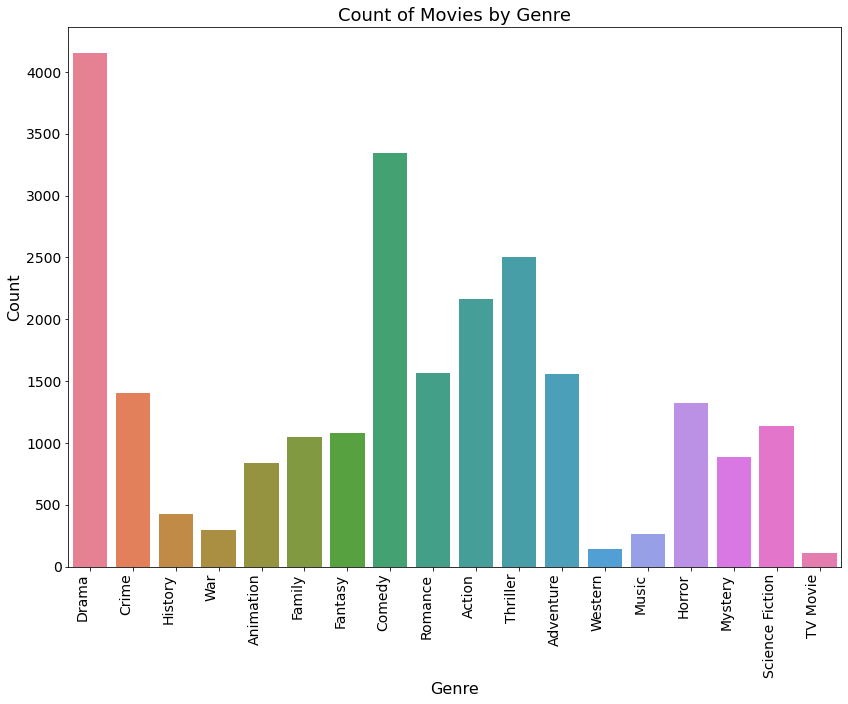

In [11]:
colors = sns.color_palette("husl", len(genre_count))
plt.figure(figsize=(12, 10))
sns.barplot(x=genre_count.keys(),y=genre_count.values(), palette=colors)
plt.xticks(rotation=90, ha='right')
plt.title('Count of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Observations**  
* Lowest Genre movies is TV Movie (only 106 movies)
* Highest Genre movies is Drama (4155 movies), followed by Crime (1405)

In [12]:
movies.loc[100:110,'overview'].values

array(['After his classmate and crush is diagnosed with a pancreatic disease, an average high schooler sets out to make the most of her final days.',
       "Tanjiro Kamado, joined with Inosuke Hashibira, a boy raised by boars who wears a boar's head, and Zenitsu Agatsuma, a scared boy who reveals his true power when he sleeps, boards the Infinity Train on a new mission with the Fire Hashira, Kyojuro Rengoku, to defeat a demon who has been tormenting the people and killing the demon slayers who oppose it!",
       'In 1930s Korea, a swindler and a young woman pose as a Japanese count and a handmaiden to seduce a Japanese heiress and steal her fortune.',
       'After more than thirty years of service as one of the Navy’s top aviators, and dodging the advancement in rank that would ground him, Pete “Maverick” Mitchell finds himself training a detachment of TOP GUN graduates for a specialized mission the likes of which no living pilot has ever seen.',
       "After her werewolf lover une

## **3. Text Cleaning**
 - Removing digits and words containing digits
 - Removing newline characters and extra spaces
 - Removing URLs
 - Removing punctuations

### 3.1 Removing digits and words containing digits

In [13]:
import re
def remove_words_with_digits(text):
    return re.sub(r'\b\w*\d\w*\b', '', text)

In [14]:
movies['overview'] = movies['overview'].apply(remove_words_with_digits)
movies['overview']

0       Framed in the  for the double murder of his wi...
1       Spanning the years  to , a chronicle of the fi...
2       In the continuing saga of the Corleone crime f...
3       The true story of how businessman Oskar Schind...
4       A young girl, Chihiro, becomes trapped in a st...
                              ...                        
9246    Edward Carnby is a private investigator specia...
9247    The filmmaking team behind the hits "Scary Mov...
9248    Set on an island off the coast, a techno rave ...
9249    On his  birthday, Goku receives a mystical Dra...
9250    A platoon of eagles and vultures attacks the r...
Name: overview, Length: 9248, dtype: object

### 3.2 Removing newline characters and extra spaces

In [15]:
def remove_new_line_extra_spaces(text):
    return re.sub('\n', ' ', text)

In [16]:
movies['overview'] = movies['overview'].apply(remove_new_line_extra_spaces)
movies['overview']

0       Framed in the  for the double murder of his wi...
1       Spanning the years  to , a chronicle of the fi...
2       In the continuing saga of the Corleone crime f...
3       The true story of how businessman Oskar Schind...
4       A young girl, Chihiro, becomes trapped in a st...
                              ...                        
9246    Edward Carnby is a private investigator specia...
9247    The filmmaking team behind the hits "Scary Mov...
9248    Set on an island off the coast, a techno rave ...
9249    On his  birthday, Goku receives a mystical Dra...
9250    A platoon of eagles and vultures attacks the r...
Name: overview, Length: 9248, dtype: object

### 3.3 Removing URLs

In [17]:
def remove_urls(text):
    return re.sub(r'https?://\S+|www.\.\S+', '', text)

In [18]:
movies['overview'] = movies['overview'].apply(remove_urls)
movies['overview']

0       Framed in the  for the double murder of his wi...
1       Spanning the years  to , a chronicle of the fi...
2       In the continuing saga of the Corleone crime f...
3       The true story of how businessman Oskar Schind...
4       A young girl, Chihiro, becomes trapped in a st...
                              ...                        
9246    Edward Carnby is a private investigator specia...
9247    The filmmaking team behind the hits "Scary Mov...
9248    Set on an island off the coast, a techno rave ...
9249    On his  birthday, Goku receives a mystical Dra...
9250    A platoon of eagles and vultures attacks the r...
Name: overview, Length: 9248, dtype: object

### 3.4 Removing punctuations

In [19]:
import string
def remove_punctuations(text):
    exclude = string.punctuation
    translator = str.maketrans('', '', exclude)
    return text.translate(translator)

In [20]:
movies['overview'] = movies['overview'].apply(remove_punctuations)
movies['overview']

0       Framed in the  for the double murder of his wi...
1       Spanning the years  to  a chronicle of the fic...
2       In the continuing saga of the Corleone crime f...
3       The true story of how businessman Oskar Schind...
4       A young girl Chihiro becomes trapped in a stra...
                              ...                        
9246    Edward Carnby is a private investigator specia...
9247    The filmmaking team behind the hits Scary Movi...
9248    Set on an island off the coast a techno rave p...
9249    On his  birthday Goku receives a mystical Drag...
9250    A platoon of eagles and vultures attacks the r...
Name: overview, Length: 9248, dtype: object

## **4. Text Preprocessing**
Here we clean up our data (Overview of the movie) by using the below preprocessing techniques
* Case Folding
* Expand Contractions
* Spelling Correction
* Tokenize Text
* Removing 'english' stop words
* Stemming

### 4.1 Case Folding

In [21]:
movies['overview'] = movies['overview'].str.lower()
movies['overview']

0       framed in the  for the double murder of his wi...
1       spanning the years  to  a chronicle of the fic...
2       in the continuing saga of the corleone crime f...
3       the true story of how businessman oskar schind...
4       a young girl chihiro becomes trapped in a stra...
                              ...                        
9246    edward carnby is a private investigator specia...
9247    the filmmaking team behind the hits scary movi...
9248    set on an island off the coast a techno rave p...
9249    on his  birthday goku receives a mystical drag...
9250    a platoon of eagles and vultures attacks the r...
Name: overview, Length: 9248, dtype: object

### 4.2 Expand Contractions

In [22]:
import contractions

def Expand_Contractions(text):
    return contractions.fix(text)

In [23]:
movies['overview'] = movies['overview'].apply(Expand_Contractions)
movies['overview']

0       framed in the  for the double murder of his wi...
1       spanning the years  to  a chronicle of the fic...
2       in the continuing saga of the corleone crime f...
3       the true story of how businessman oskar schind...
4       a young girl chihiro becomes trapped in a stra...
                              ...                        
9246    edward carnby is a private investigator specia...
9247    the filmmaking team behind the hits scary movi...
9248    set on an island off the coast a techno rave p...
9249    on his  birthday goku receives a mystical drag...
9250    a platoon of eagles and vultures attacks the r...
Name: overview, Length: 9248, dtype: object

### 4.3 Spelling Correction

In [44]:
from textblob import TextBlob

def correct_spellings(text):
    blob = TextBlob(text)
    corrected_text = ' '.join([str(word.correct()) for word in blob.words])
    return corrected_text

In [47]:
from spellchecker import SpellChecker

def correct_spellings(text):
    # Create a SpellChecker object
    spell = SpellChecker()
    
    # Split the text into words
    words = text.split()
    
    # Perform spelling correction for each word
    corrected_words = []
    for word in words:
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)
    
    # Join the corrected words back into a string
    corrected_text = ' '.join(corrected_words)
    
    return corrected_text


In [48]:
movies['overview'] = movies['overview'].apply(correct_spellings)
movies['overview']

0       framed in the for the double murder of his wif...
1       spanning the years to a chronicle of the ficti...
2       in the continuing saga of the cornpone crime f...
3       the true story of how businessman okay swindle...
4       a young girl chihiro becomes trapped in a stra...
                              ...                        
9246    toward carny is a private investigator special...
9247    the filmmaking team behind the hits scary movi...
9248    set on an island off the coast a techno rave p...
9249    on his birthday you receives a mystical dragon...
9250    a platoon of eagles and vultures attacks the r...
Name: overview, Length: 9248, dtype: object

### 4.4 Tokenize Text

In [39]:
import spacy
nlp = spacy.load('en_core_web_sm')
def tokenize_text(text):
    doc = nlp(text)
    return ' '.join(token.text for token in doc)


In [40]:
movies['overview'] = movies['overview'].apply(tokenize_text)
movies['overview']

0       framed in the for the double murder of his wif...
1       spanning the years to a chronicle of the ficti...
2       in the continuing saga of the cornpone crime f...
3       the true story of how businessman okay swindle...
4       a young girl chihiro becomes trapped in a stra...
                              ...                        
9243    toward carny is a private investigator special...
9244    the filmmaking team behind the hits scary movi...
9245    set on an island off the coast a techno rave p...
9246    on his birthday you receives a mystical dragon...
9247    a platoon of eagles and vultures attacks the r...
Name: overview, Length: 9248, dtype: object

### 4.5 Stopwords Removal

In [41]:
import spacy

nlp = spacy.load('en_core_web_sm')
def remove_stopwords_spacy(text):
    new_text = list()
    for word in text.split():
        if word not in nlp.Defaults.stop_words:
            new_text.append(word)
    return " ".join(new_text)

In [42]:
movies['overview'] = movies['overview'].apply(remove_stopwords_spacy)
movies['overview']

0       framed double murder wife lover upstanding ban...
1       spanning years chronicle fictional italianamer...
2       continuing saga cornpone crime family young ve...
3       true story businessman okay swindler saved tho...
4       young girl chihiro trapped strange new world s...
                              ...                        
9243    carny private investigator specializing unexpl...
9244    filmmaking team hits scary movie date movie ep...
9245    set island coast techno rave party attracts di...
9246    birthday receives mystical dragonball gift gra...
9247    platoon eagles vultures attacks residents smal...
Name: overview, Length: 9248, dtype: object

### 4.6 Stemming

In [43]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stemming(text):
    porter = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [porter.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [44]:
movies['overview'] = movies['overview'].apply(stemming)
movies['overview']

0       frame doubl murder wife lover upstand banker d...
1       span year chronicl fiction italianamerican cor...
2       continu saga cornpon crime famili young veto c...
3       true stori businessman okay swindler save thou...
4       young girl chihiro trap strang new world spiri...
                              ...                        
9243    carni privat investig special unexplain supern...
9244    filmmak team hit scari movi date movi epic mov...
9245    set island coast techno rave parti attract div...
9246    birthday receiv mystic dragonbal gift grandfat...
9247    platoon eagl vultur attack resid small town pe...
Name: overview, Length: 9248, dtype: object

In [ ]:
import contractions
import spacy
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import string 

nlp = spacy.load('en_core_web_sm')

def remove_stopwords_spacy(text):
    new_text = list()
    for word in text.split():
        if word not in nlp.Defaults.stop_words:
            new_text.append(word)
    return " ".join(new_text)


def Text_Cleaning(text):
    text = re.sub(r'\b\w*\d\w*\b', '', text)                                      # Removing digits and words containing digits
    text = re.sub('\n', ' ', text)                                                # Removing newline characters and extra spaces
    text = re.sub(r'https?://\S+|www.\.\S+', '', text)                            # Removing URLs
    exclude = string.punctuation                                                  # Removing punctuations
    translator = str.maketrans('', '', exclude)
    return text.translate(translator)

def Text_Preprocessing(text):
    text = text.lower()                                                           # Case Folding
    text = contractions.fix(text)                                                 # Expand Contractions
    text = ' '.join([str(word.correct()) for word in TextBlob(text).words])       # Spelling Correction
    text = ' '.join(token.text for token in nlp(text))                            # Tokenize Text
    text = remove_stopwords_spacy(text)                                           # Stopwords Removal
    text = ' '.join([PorterStemmer().stem(word) for word in word_tokenize(text)]) # Stemming
    return text

## **Save the Pre-Processed Dataframe in a New CSV File**

In [45]:
movies.to_csv('Datasets/Processed_Datasets/Pre-Processed_TMDB_Movies.csv')

In [47]:
movies = pd.read_csv('Datasets/Processed_Datasets/Pre-Processed_TMDB_Movies.csv')[['title','overview','genres']]
movies.head()

,title,overview,genres
0,The Shawshank Redemption,frame doubl murder wife lover upstand banker d...,"Drama,Crime"
1,The Godfather,span year chronicl fiction italianamerican cor...,"Drama,Crime"
2,The Godfather Part II,continu saga cornpon crime famili young veto c...,"Drama,Crime"
3,Schindler's List,true stori businessman okay swindler save thou...,"Drama,History,War"
4,Spirited Away,young girl chihiro trap strang new world spiri...,"Animation,Family,Fantasy"


In [48]:
movies.shape

(9248, 3)